### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

- 表示我们更重视当前的奖励，离现在越远的奖励越不重视
- 防止出现环状轮回步骤时，陷入无限轮回出不来

2. Please breifly explain what is value function and what is Q function ?

value function:在某一状态下，采取各种action，获得奖励的期望值


Q function:在某一状态下，采取某种action，获得奖励的值


3. How temporal difference related to dynamic programming and monte-carlo methods ?

https://zhuanlan.zhihu.com/p/108286901

temporal difference 时序差分，没走一步进行更新；

dynamic programming 动态规划，是全宽备份，每次迭代基于所有可能的后续状态，求期望，而不是只采样某一后续状态

Monte-Carlo 蒙特卡洛，是model-free的方法，不需要知道先验知识，通过与环境交互获取经验采样进行学习

4. Please briefly describe what are value iteration and policy iteration ?

参考：https://zhuanlan.zhihu.com/p/33229439
value iteration：价值迭代，随机初始化每个状态的值，逐一尝试每个action，记录Action带来的Reward、以及新状态 V(s')，选择最优的Action，更新V(s) = Reward + V(s')，不断迭代


参考：https://zhuanlan.zhihu.com/p/34006925
policy iteration：策略迭代，随机选择一个策略作为初始值，根据当前的策略计算V(s)，计算当前状态的最好Action，更新策略。不停的重复策略评估和策略提升，直到策略不再变化为止

5. How can we use deep learning in reinforcement learning ?

- deep Q-network:当强化学习中的状态太多，如果记录下所有状态，那需要很大内存。这时可以结合神经网络，将强化学习的状态和动作作为神经网络的输入，直接得出Q值作为输出

- policy gradient：policy network 策略网路，就是一个神经网络，输入是状态，输出直接就是动作。policy gradient，要使用梯度下降的方法来更新网络，



### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

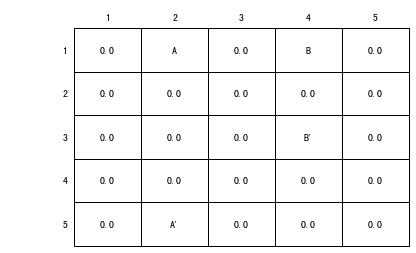

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those that move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [4]:
A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5
    next_state = (np.array(state)+action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward    

In [7]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [8]:
def results():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i, next_J), reward = step([i,j],action)
                    new_value[i,j] += ACTION_PROB*(reward+DISCOUNT*value[next_i,next_J])
                    
        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            plt.show()
            break
        value = new_value

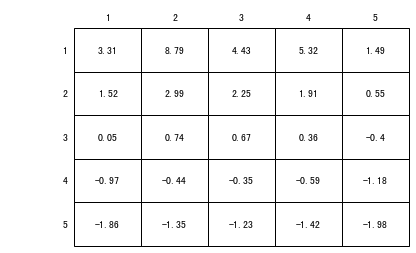

In [9]:
results()